In [9]:
import aerosandbox as asb
import aerosandbox.numpy as np
from shutil import which
from aerosandbox.tools.pretty_plots import plt, show_plot, set_ticks
from aerosandbox.tools.string_formatting import eng_string

In [3]:
airfoil = asb.Airfoil("S1223")

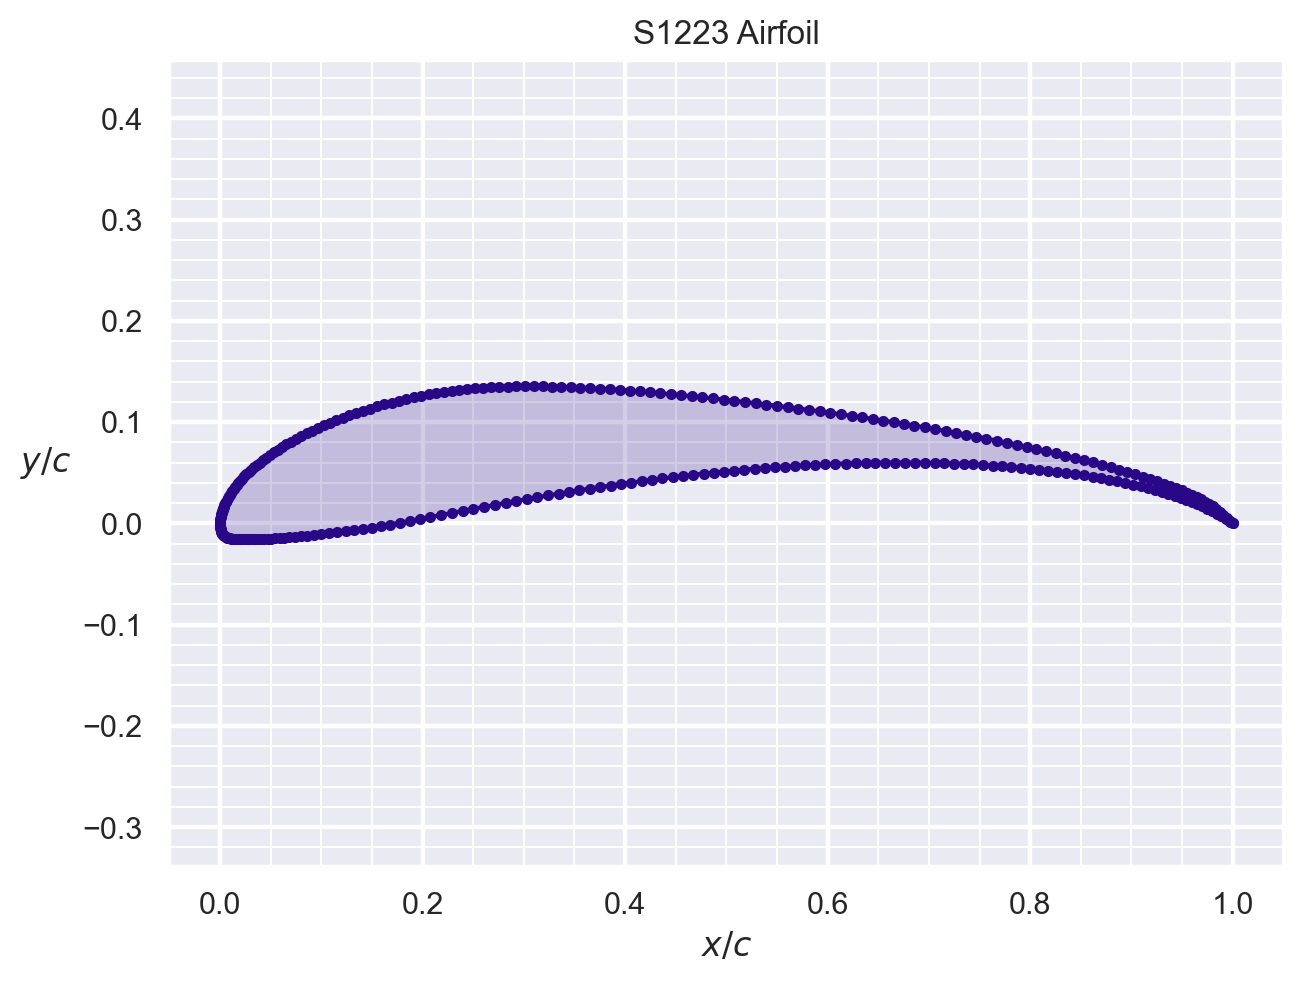

In [8]:
fig, ax = plt.subplots()
airfoil.draw()

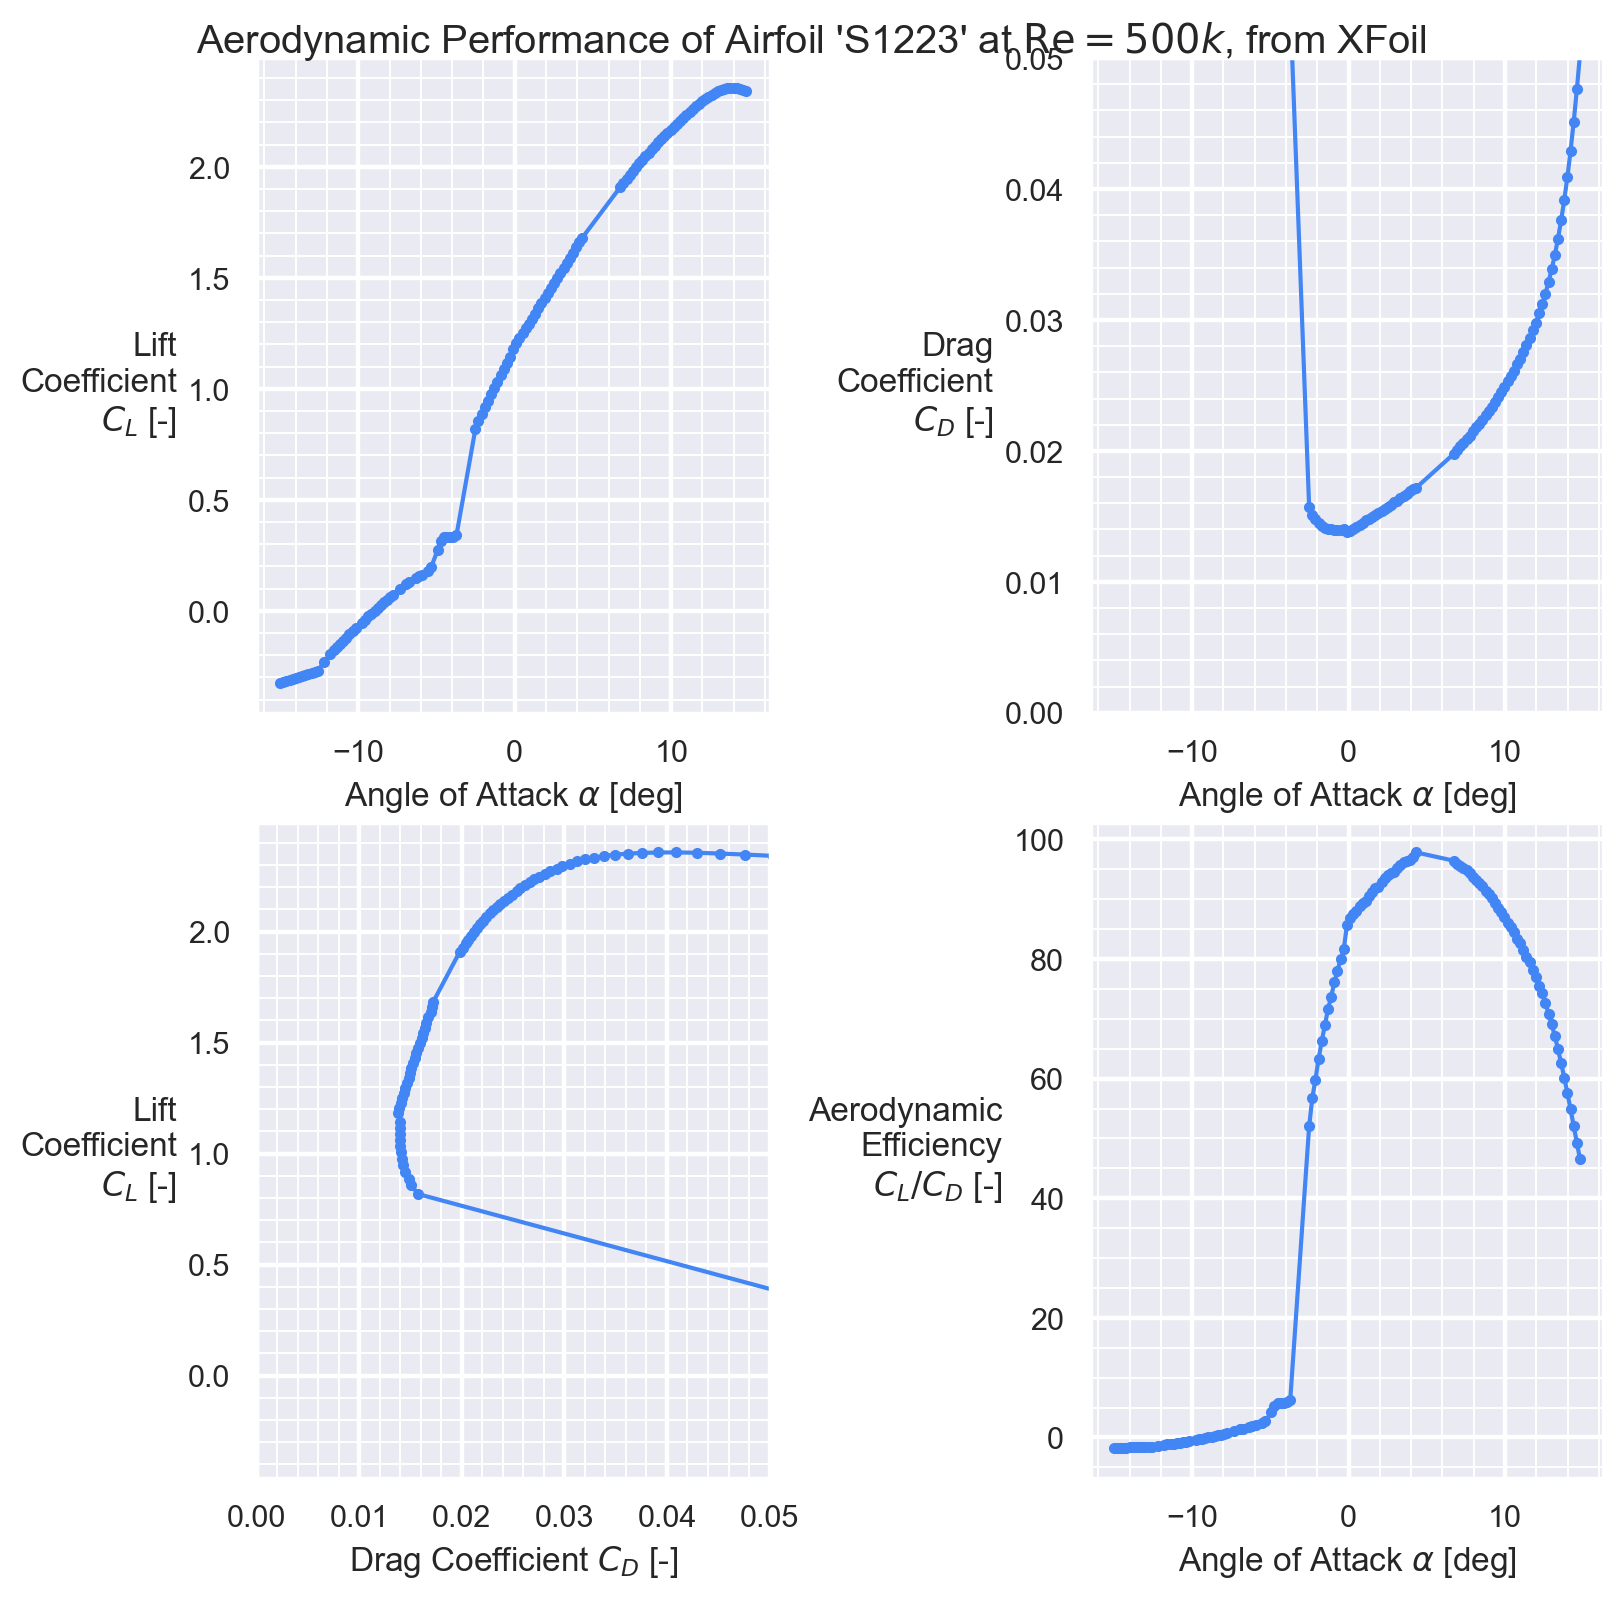

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))
Re = 5e5
alpha_inputs = np.linspace(-15, 15, 150)
xf_run = asb.XFoil(airfoil, Re=Re, max_iter=20, timeout=None).alpha(alpha_inputs)
xa = xf_run['alpha']
xCL = xf_run['CL']
xCD = xf_run['CD']

plt.sca(ax[0,0])
plt.plot(xa, xCL, ".-")
plt.xlabel(r"Angle of Attack $\alpha$ [deg]")
plt.ylabel(r"Lift Coefficient $C_L$ [-]")

plt.sca(ax[0, 1])
plt.plot(xa, xCD, ".-")
plt.xlabel(r"Angle of Attack $\alpha$ [deg]")
plt.ylabel(r"Drag Coefficient $C_D$ [-]")
plt.ylim(0, 0.05)

plt.sca(ax[1, 0])
plt.plot(xCD, xCL, ".-")
plt.xlabel(r"Drag Coefficient $C_D$ [-]")
plt.ylabel(r"Lift Coefficient $C_L$ [-]")
plt.xlim(0, 0.05)

plt.sca(ax[1, 1])
plt.plot(xa, xCL / xCD, ".-")
plt.xlabel(r"Angle of Attack $\alpha$ [deg]")
plt.ylabel(r"Aerodynamic Efficiency $C_L / C_D$ [-]")
show_plot(f"Aerodynamic Performance of Airfoil '{airfoil.name}' at $\\mathrm{{Re}}={eng_string(Re)}$, from XFoil")